**1-**
Primero se importa la librería *pandas* como *pd* y se utiliza la función *read_csv()* para leer el archivo de la NASA y transformarlo en un DataFrame. Con el método *df.shape* se muestran las dimensiones del conjunto de datos, es decir, la cantidad total de filas y columnas. Después, mediante *df.columns* se obtienen los nombres exactos de cada variable. Finalmente, al aplicar *df.head(15)* se visualizan las primeras 15 filas, lo cual permite comprobar que los datos se hayan cargado correctamente.

In [2]:
import pandas as pd
df = pd.read_csv("NASA.csv")
print("Dimensiones del DataFrame:", df.shape)
print("\nColumnas del DataFrame:", df.columns.tolist())
print("\nPrimeras 15 filas:\n", df.head(15))

Dimensiones del DataFrame: (1503, 6)

Columnas del DataFrame: ['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion']

Primeras 15 filas:
     frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    

**2-**
En este paso se separa el conjunto de datos en dos partes: un 70% para el entrenamiento del modelo y un 30% para la validación. Se utiliza la función *df.sample(frac=0.7)*, que selecciona aleatoriamente las observaciones para el entrenamiento, mientras que con *df.drop(train.index)* se forma el conjunto de prueba. Posteriormente, con el método *.shape* se muestran las dimensiones de cada subconjunto y mediante una suma se verifica que la cantidad total de observaciones coincida con las 1503 originales. Finalmente, al aplicar *train.head(15)* se vizualizan las primeras 15 filas del train y con el *test.head(15)* se vizualizan las primeras 15 filas para la validación.

In [11]:
train = df.sample(frac=0.7)   
test = df.drop(train.index)        
print("Train:", train.shape)      
print("Test:", test.shape)     
sum = train.shape[0] + test.shape[0]
print("Train + Test:", sum)    

print("Train\n",train.head(15))             
print("\nTest\n",test.head(15))

Train: (1052, 6)
Test: (451, 6)
Train + Test: 1503
Train
       frecuencia  angulo  longitud  velocidad   espesor  presion
386         3150     5.3    0.2286       39.6  0.006143  118.441
1245        2000     0.0    0.1016       71.3  0.001211  132.095
743         2500     0.0    0.0508       55.5  0.000762  133.956
755         2000     0.0    0.0508       39.6  0.000792  132.918
1451        2000    12.3    0.1016       39.6  0.040827  114.085
1130         250    12.7    0.0254       39.6  0.013025  121.547
140         6300     3.0    0.3048       39.6  0.004957  114.042
717         1250    12.6    0.1524       39.6  0.058411  112.160
581         6300     5.4    0.1524       39.6  0.004850  116.677
273          500     2.0    0.2286       39.6  0.003466  125.157
1347        1250     6.7    0.1016       71.3  0.004783  137.658
1444         400    12.3    0.1016       39.6  0.040827  128.265
1185         630    17.4    0.0254       39.6  0.017221  124.514
1055        6300     4.8    0.02

**3-**
En este bloque se construye el modelo de regresión lineal múltiple utilizando la librería *statsmodels.api* Primero se definen las variables independientes eliminando la columna presion (X) y se asigna esta última como variable dependiente (Y). Con *sm.add_constant(X)* se añade la constante del modelo, y a través de *sm.OLS(Y,sm.add_constant(X))* se ajusta la regresión. Luego, con *model.fit()* se obtiene el modelo entrenado y mediante *results.predict()* se calculan las predicciones sobre los datos de entrenamiento. Finalmente, se imprime el resumen estadístico del modelo *(results.summary())*, así como los p-values exactos de cada variable, que permiten identificar cuáles son estadísticamente significativas.

In [13]:
import statsmodels.api as sm 
X = train.drop('presion',axis = 1)
Y = train.presion
model= sm.OLS(Y,sm.add_constant(X))
results = model.fit()
yHat = results.predict(sm.add_constant(X))
print(results.summary())
print("\np-values con cifras significativas:\n",results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     219.4
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          4.18e-160
Time:                        21:15:50   Log-Likelihood:                -3151.2
No. Observations:                1052   AIC:                             6314.
Df Residuals:                    1046   BIC:                             6344.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.8932      0.664    200.212      0.0

**4-**
En este bloque se evalúa la significancia estadística de las variables dentro del modelo. Se define un nivel de significancia α =0.05 y se extraen tanto los p-values como los estadísticos t de cada variable, excluyendo la constante. Con esto, se genera una lista de las variables cuyo p-value es menor a 0.05, es decir, aquellas que tienen una asociación lineal significativa con la variable dependiente. Después, se imprimen en consola dichas variables junto con sus p-values en notación científica. Finalmente, se identifica la variable más importante del modelo mediante el valor absoluto más alto del estadístico t, lo cual indica cuál variable tiene mayor peso en la explicación de la variable presion.

In [14]:
import numpy as np
alpha = 0.05

pvals = results.pvalues.drop('const', errors='ignore')
tvals = results.tvalues.drop('const', errors='ignore')
significativas = pvals[pvals < alpha].index.tolist()

print("¿Existe al menos una variable significativa?")
if significativas:
    print(f"Sí. Variables con p-value < {alpha}: {significativas}")
else:
    print("No, ninguna variable es significativa.")

# Imprime variables significativas
print("\nVariables con asociación lineal significativa:")
for var in significativas:
    print(f"- {var} (p-value = {pvals[var]:.2e})")
var_importante = tvals.abs().idxmax()
print(f"\nLa variable más importante del modelo es: {var_importante} "
      f"(t = {tvals[var_importante]:.2f})")

¿Existe al menos una variable significativa?
Sí. Variables con p-value < 0.05: ['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor']

Variables con asociación lineal significativa:
- frecuencia (p-value = 9.91e-111)
- angulo (p-value = 3.49e-21)
- longitud (p-value = 3.05e-65)
- velocidad (p-value = 7.01e-23)
- espesor (p-value = 1.13e-12)

La variable más importante del modelo es: frecuencia (t = -25.32)


**5-**
En este bloque se calcula el RSE Y el R^2 de desempeño tanto para el conjunto de entrenamiento como para el de prueba. Para los datos de entrenamiento, el (RSE) se obtiene como la raíz cuadrada de *results.scale*, mientras que el R^2 se imprime directamente con *results.rsquared*.

En el conjunto de prueba, primero se separan las variables predictoras *(xtest)* y la variable objetivo *(ytest)* y con el modelo entrenado se generan las predicciones *(yhat)*. Posteriormente, se calcula la suma de residuos al cuadrado (RSS) y la suma total de cuadrados (TSS). Con estos valores, el RSE se obtiene dividiendo el RSS entre los grados de libertad *(n−m−1)* y aplicando la raíz cuadrada, mientras que el R^2 se determina como *(1−(RSS/TSS))*. Finalmente, se imprimen en consola ambos indicadores para comparar el rendimiento del modelo en entrenamiento y validación.

In [15]:
print("RSE entrenamiento:",np.sqrt(results.scale))
print("R^2 entrenamiento: ", results.rsquared)

xtest = test.drop('presion',axis=1)
yhat = results.predict(sm.add_constant(xtest))
ytest = test.presion
RSStest = np.sum((ytest-yhat)**2)
TSSTest = np.sum((ytest-np.mean(ytest))**2)
n = xtest.shape[0]
m = xtest.shape[1]
RSETest = np.sqrt(RSStest/(n-m-1))
R2Test = 1-(RSStest/TSSTest)

print("\nRSE test:",RSETest)
print("R^2 test: ", R2Test)

RSE entrenamiento: 4.852039119508667
R^2 entrenamiento:  0.5118765059416741

RSE test: 4.748920482371647
R^2 test:  0.5218551106490673


**6-**
En este bloque se realiza una visualización comparativa entre los valores reales de la variable dependiente y las predicciones del modelo. Primero se define el rango común *(lims)* para que tanto el eje X como el eje Y compartan los mismos límites. Con *plt.scatter()* se genera la dispersión de los valores reales frente a los estimados, mientras que con *plt.plot()* se dibuja la línea de 45° que representa la predicción de cuando los valores reales y estimados coinciden.

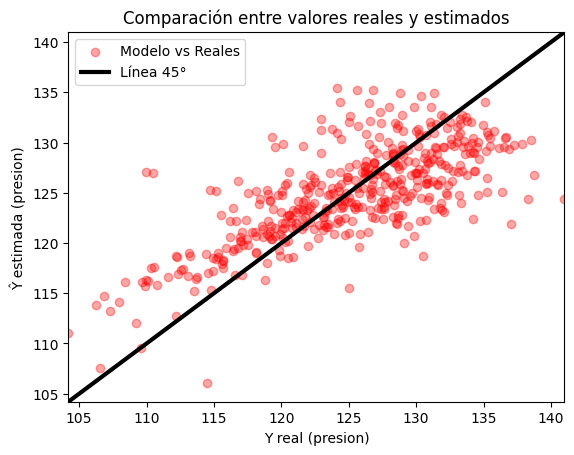

In [20]:
import matplotlib.pyplot as plt
lims = [min(ytest.min(), yhat.min()), max(ytest.max(), yhat.max())]
plt.scatter(ytest, yhat, alpha=0.35, label='Modelo vs Reales', c='r')
plt.plot(lims, lims, linewidth=3, c='k', label='Línea 45°')
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel("Y real (presion)")
plt.ylabel("Ŷ estimada (presion)")
plt.title("Comparación entre valores reales y estimados")
plt.legend()
plt.show()

La dispersión de los puntos muestra una tendencia cercana a la línea de 45°, lo cual indica que el modelo logra capturar de manera razonable la relación entre las variables y puede estimar los valores de presión con una precisión moderada. Sin embargo, se observa que muchos puntos se alejan un poco de la línea, lo que significa que el modelo no predice con exactitud perfecta y existen errores residuales. Esto es consistente con los valores de R² (~0.52), que señalan que el modelo explica un poco más de la mitad de la variabilidad de la presión.